# Otsu Thresholding Plots

60
variances: 1789.2151520297903, 183.81067300502167
ratios: 0.6478186881188119, 0.3521813118811881


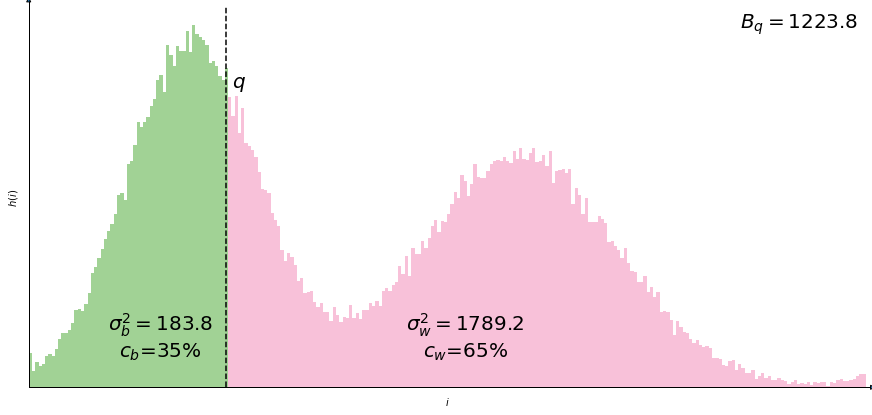

In [3]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt
from skimage import data
from mpl_toolkits.axisartist.axislines import SubplotZero


img = data.coins()
img = np.zeros_like(img)
# init the random generator so we get the same image every time
np.random.seed(42)
# fill with normal distribution with mean 100 and std 20
img[:,:img.shape[1]//2] = np.random.normal(50, 20, (img.shape[0],img.shape[1]//2)).astype(np.uint8) 
img[:,img.shape[1]//2:] =  np.random.normal(150, 30, (img.shape[0],img.shape[1]//2)).astype(np.uint8)
img = np.clip(img, 0, 255)

# Otsu's thresholding
ret, th = cv.threshold(img,0,255,cv.THRESH_BINARY+cv.THRESH_OTSU)
th = th > 0 

# manual threshold 
ret = 60
th = img > ret

show_text = True

print(ret)
print(f'variances: {np.var(img[th])}, {np.var(img[~th])}')
print(f'ratios: {np.sum(th)/img.size}, {np.sum(~th)/img.size}')
var_w, var_b = np.var(img[th]), np.var(img[~th])
c_w, c_b = np.sum(th)/img.size, np.sum(~th)/img.size
mean_w, mean_b = np.mean(img[th]), np.mean(img[~th])

Bq = c_w * var_w + c_b * var_b

# plot the thresholded image and the histogram
fig = plt.figure(figsize=(15, 7), facecolor="white")
ax = SubplotZero(fig, 111)
fig.add_subplot(ax, fontsize=20)

for direction in ["xzero", "yzero"]:
    # adds arrows at the ends of each axis
    ax.axis[direction].set_axisline_style("-|>")

    # adds X and Y-axis from the origin
    ax.axis[direction].set_visible(True)

for direction in ["left", "right", "bottom", "top"]:
    # hides borders
    ax.axis[direction].set_visible(False)
plt.xlim([0, 255]), plt.xticks([]), plt.xlabel("$i$", fontsize=20)
plt.yticks([]), plt.ylabel("$h(i)$", fontsize=20)
plt.hist(img[th].ravel(), range=[0, 255], bins=256, color=(248/255, 193/255, 217/255))
plt.hist(img[np.invert(th)].ravel(), range=[0, 255], bins=256, color=(161/255, 210/255, 149/255))
# draw a vertical line at the threshold
plt.axvline(x=ret, color="black", linestyle="--")
# annotate the threshold with q
plt.annotate(f" $q$", xy=(ret, 1000), fontsize=20)

if show_text:
    # annotate the variance of the background with var_b
    plt.annotate(f"$\sigma_b^2={var_b:.1f}$\n$c_b$={c_b*100:.0f}%", xy=(mean_b, 100), fontsize=20, horizontalalignment="center")
    # annotate the variance of the foreground with var_w
    plt.annotate(f"$\sigma_w^2={var_w:.1f}$\n$c_w$={c_w*100:.0f}%", xy=(mean_w, 100), fontsize=20, horizontalalignment="center")

    # annotete the between class variance with Bq in the right top corner
    plt.annotate(f"$B_q={Bq:.1f}$  ", xy=(255, 1200), fontsize=20, horizontalalignment="right")

plt.show()
# return fig

# save the figure
fig.savefig("otsu_thresholding.png", dpi=300, bbox_inches="tight")
